In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. More about that later. 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
from pylab import *
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [5]:
df = pd.read_csv('./data.csv')
df = df.set_index('nodes')

In [6]:
df.head()

,memory
nodes,
1,1
2,2
3,3
4,4
5,5


In [7]:
df.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
           dtype='int64', name='nodes')

Text(0, 0.5, 'Memory (MB)')

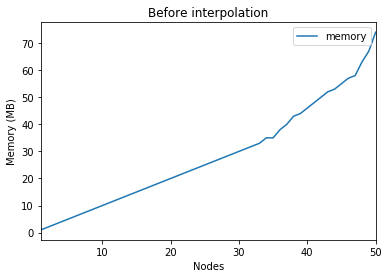

In [8]:
ax = df.plot.line()
ax.set_title('Before interpolation')
ax.set_xlabel("Nodes")
ax.set_ylabel("Memory (MB)")

In [9]:
f = interp1d(df.index, df['memory'], kind='cubic')

In [10]:
df_int = pd.DataFrame()
new_index = np.arange(1,50)
df_int['memory'] = f(new_index)
df_int.index = new_index

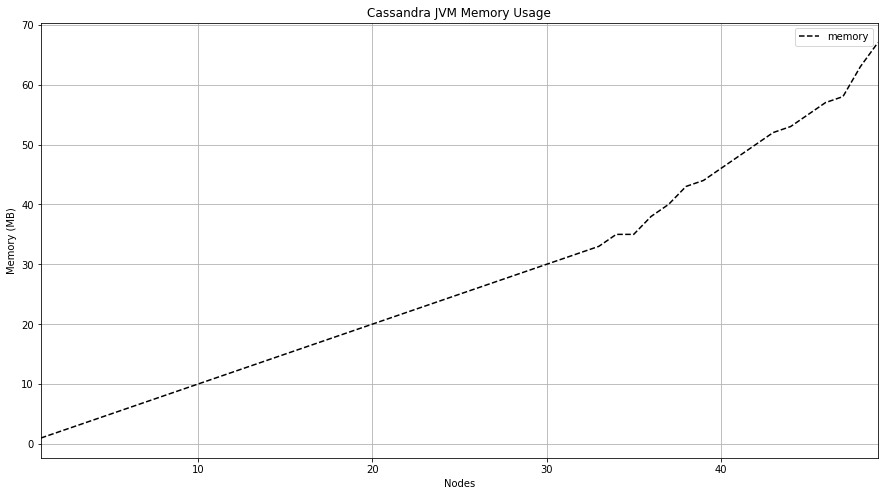

In [11]:
ax2 = df_int.plot.line(figsize=(15,8), style='k--', grid=True)
ax2.set_title('Cassandra JVM Memory Usage')
ax2.set_xlabel("Nodes")
ax2.set_ylabel("Memory (MB)")
plt.savefig('plot.png')

In [12]:
df_after = pd.read_csv('./data2_after_heap.csv')
df_after = df_after.set_index('nodes')

In [13]:
df_after.head()

,memory
nodes,
5,5
10,10
15,16
20,35
25,43


In [14]:
df_after.index

Int64Index([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
            90, 100],
           dtype='int64', name='nodes')

Text(0, 0.5, 'Memory (MB)')

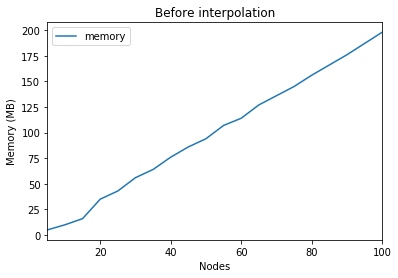

In [25]:
ax3 = df_after.plot.line()
ax3.set_title('Before interpolation')
ax3.set_xlabel("Nodes")
ax3.set_ylabel("Memory (MB)")

In [26]:
f = interp1d(df_after.index, df_after['memory'], kind='cubic')

In [27]:
df_int_after = pd.DataFrame()
new_index = np.arange(5, 100, 5)
# print(new_index)
df_int_after['memory'] = f(new_index)
df_int_after.index = new_index

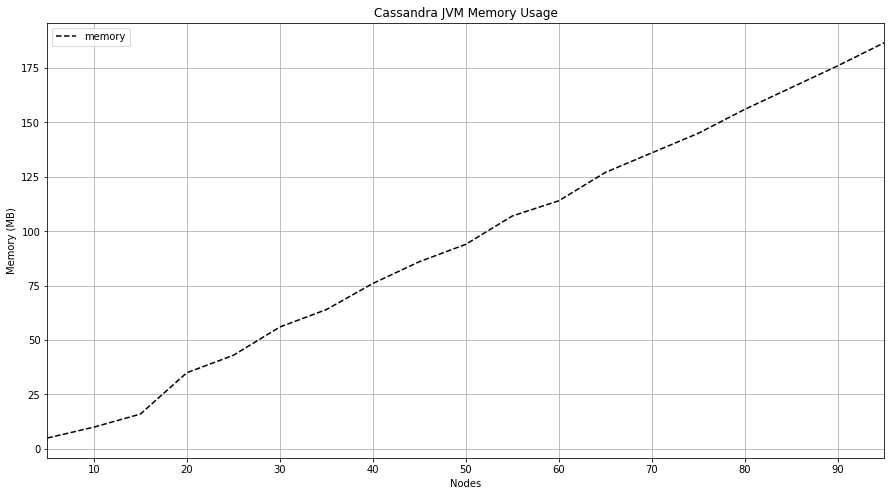

In [28]:
ax4 = df_int_after.plot.line(figsize=(15,8), style='k--', grid=True)
ax4.set_title('Cassandra JVM Memory Usage')
ax4.set_xlabel("Nodes")
ax4.set_ylabel("Memory (MB)")
plt.savefig('plot2.png')